Basic experimentation
=============

Step 1
----

Make sure imports are fine and we can read data



In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

try:
    train = pd.read_csv('../input/train.csv')
except:
    print "Error Reading Training Dataset CSV"

    
try:
    spray = pd.read_csv('../input/spray.csv')
except:
    print "Error Reading Spray Dataset CSV"

try:
    weather = pd.read_csv('../input/weather.csv')
except:
    print "Error Reading Weather Dataset CSV"

    
try:
    test = pd.read_csv('../input/test.csv')
except:
    print "Error Reading Test Dataset CSV"
    
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


Step 2
----

Merge weather data with training and test data to prepare a "big ass object"

In [2]:
#merging Weather Data with the training dataframe
train.shape
test.shape

columns = []
original_columns = [weather.columns]
for i in original_columns:
    columns.append(i+'_1')
weather.columns = columns
weather.info()
#add data from station 1
train_weather = train.merge(right=weather[weather.Station_1==1], left_on='Date',right_on='Date_1',how='left')
train_weather.shape


columns =[]
for i in original_columns:
    columns.append(i+'_2')
weather.columns = columns
weather.info()
#add data from station 2
train_weather = train_weather.merge(right=weather[weather.Station_2==2], left_on='Date',right_on='Date_2',how='left')
train_weather.shape

#cleanup
del train_weather['Date_1']
del train_weather['Date_2']




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station_1        2944 non-null int64
Date_1           2944 non-null object
Tmax_1           2944 non-null int64
Tmin_1           2944 non-null int64
Tavg_1           2944 non-null object
Depart_1         2944 non-null object
DewPoint_1       2944 non-null int64
WetBulb_1        2944 non-null object
Heat_1           2944 non-null object
Cool_1           2944 non-null object
Sunrise_1        2944 non-null object
Sunset_1         2944 non-null object
CodeSum_1        2944 non-null object
Depth_1          2944 non-null object
Water1_1         2944 non-null object
SnowFall_1       2944 non-null object
PrecipTotal_1    2944 non-null object
StnPressure_1    2944 non-null object
SeaLevel_1       2944 non-null object
ResultSpeed_1    2944 non-null float64
ResultDir_1      2944 non-null int64
AvgSpeed_1       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+

Step 3
----

Use this "big ass object" for all your needs

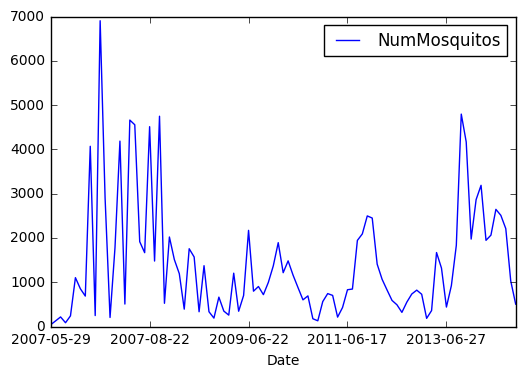

In [5]:
#train_weather.info()
plotableraw = train_weather[['Date', 'NumMosquitos']]
plotable = plotableraw.groupby('Date')
summed = plotable.sum()
summed.plot()
#plotable.sort_values(by='Date',ascending=False)
#plotable.head()
#plotable.head().plot(kind='bar')

